In [1]:
# Importing libraries
import seaborn as sns 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
#input dataset downloaded fom faostat
hunger = pd.read_csv("Hungerandfoodin.security.csv")
hunger.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,351,China,6132,Value,210011,Number of people undernourished (million) (3-y...,20002002,2000-2002,millions,132.5,F,FAO estimate,NaN
1,FS,Suite of Food Security Indicators,351,China,6132,Value,210011,Number of people undernourished (million) (3-y...,20012003,2001-2003,millions,125.0,F,FAO estimate,NaN
2,FS,Suite of Food Security Indicators,351,China,6132,Value,210011,Number of people undernourished (million) (3-y...,20022004,2002-2004,millions,116.3,F,FAO estimate,NaN
3,FS,Suite of Food Security Indicators,351,China,6132,Value,210011,Number of people undernourished (million) (3-y...,20032005,2003-2005,millions,106.5,F,FAO estimate,NaN
4,FS,Suite of Food Security Indicators,351,China,6132,Value,210011,Number of people undernourished (million) (3-y...,20042006,2004-2006,millions,95.4,F,FAO estimate,NaN


In [3]:
hunger["Value"]

0     132.5
1     125.0
2     116.3
3     106.5
4      95.4
5      83.2
6      69.1
7      54.9
8      39.6
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
Name: Value, dtype: float64

### Barplot

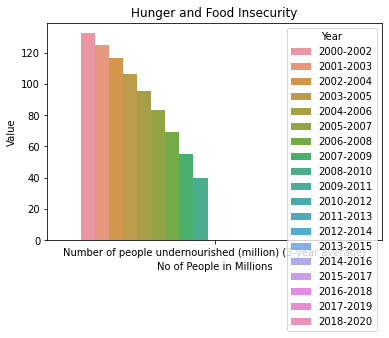

In [4]:
sns.barplot(x = "Item", y= "Value", data=hunger, hue="Year" )
plt.title("Hunger and Food Insecurity")
plt.xlabel("No of People in Millions")
plt.show()

### Concatenate files having same structure 

In [5]:
from glob import glob

In [6]:
files = sorted(glob('hungerdata/Hungerandfoodin.*'))
files 

['hungerdata\\Hungerandfoodin.india.csv',
 'hungerdata\\Hungerandfoodin.pakistan.csv',
 'hungerdata\\Hungerandfoodin.security.csv',
 'hungerdata\\Hungerandfoodin.securityNigeria.csv']

In [7]:
new = pd.concat((pd.read_csv(file).assign(filename=file)
for file in files), ignore_index=True)


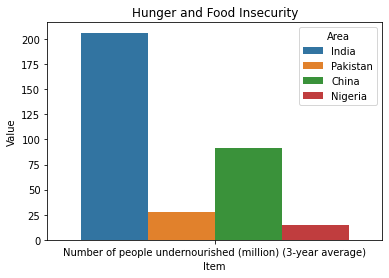

In [8]:
sns.barplot(x = "Item", y= "Value", data=new, hue="Area", ci=None)
plt.title("Hunger and Food Insecurity")
#plt.xlabel("No of People in Millions")
plt.show()

In [9]:
import plotly.express as px
df = new
fig = px.histogram(df, x="Item", y="Value", color="Area", marginal="rug", hover_data=df.columns)
fig.show()

In [10]:
import plotly.express as px
df = new
fig = px.bar(df, x="Item", y="Value", color="Area", barmode="group", title= 'Hunder and food insecurity')
fig.show()

In [11]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
df = new
fig = px.pie(df, values='Value', names='Area', title='Number of people undernourished (millions) (3-year average)')
fig.show()

### Inflation Graph

In [19]:
food = pd.read_csv("foodpriceinflation.csv")
food.head(2)

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Unit,Value,Flag,Flag Description,Note
0,CP,Consumer Price Indices,4,Afghanistan,2001,2001,23014,Food price inflation,7001,January,%,22.943765,Fc,Calculated data,NaN
1,CP,Consumer Price Indices,4,Afghanistan,2002,2002,23014,Food price inflation,7001,January,%,11.612646,Fc,Calculated data,NaN


### Make Graph of Food

In [33]:
import plotly.express as px
df = food
fig = px.bar(df, x="Year", y="Value", color="Area", barmode="group", title= 'Number of people undernourished (millions) (3-year average)')
fig.show()

In [30]:
import plotly.express as px
df = food
fig = px.bar(df, x="Year", y="Value", color="Area", barmode="group", title= 'Food Price Inflation')
fig.show()

In [ ]:
import plotly.express as px
df = food
fig = px.bar(df, x="Area", y="Year", barmode="group", facet_row="Area", facet_col="Months")
fig.show()

In [ ]:
import plotly.express as px
df = food
fig = px.pie(df, values='Value', names='Area', title='Food Price Inflation')
fig.show()

In [ ]:
sns.lineplot(x = "Year", y = "Value", data = food)
plt.title("Food Price Inflation")
plt.show()

In [49]:
import plotly.express as px
df = food
fig = px.ecdf(df, x="Year", y= "Value", color="Area", ecdfnorm=None, title='Food Price Inflation')
fig.show()

In [62]:
import plotly.express as px
df = food
fig = px.histogram(df, x="Area", y="Value", color="Year", title='Food Price Inflation')
fig.show()